In [1]:
import sys
import numpy as np
import xarray as xr

# matplotlib
import matplotlib.pyplot as plt
# plot styles/formatting
import cmocean.cm as cmo
import cmocean
# cartopy
import cartopy.crs as ccrs
from matplotlib.gridspec import GridSpec
from matplotlib.colorbar import Colorbar # different way to handle colorbar
import cartopy.feature as cfeature

# Path to modules
sys.path.append('../modules/')
from xarrayMannKendall import compute_MK_trend_da
from plotter import draw_basemap
from utils import select_months_ds

In [2]:
ssn_str = 'JJA'
if ssn_str == 'SON':
    mon_lst = [9, 10, 11]
    start_mon = 9
    end_mon = 11
elif ssn_str == 'DJF':
    mon_lst = [12, 1, 2]
    start_mon = 12
    end_mon = 2
elif ssn_str == 'MAM':
    mon_lst = [3, 4, 5]
    start_mon = 3
    end_mon = 5
elif ssn_str == 'JJA':
    mon_lst = [6, 7, 8]
    start_mon = 6
    end_mon = 8

In [3]:
## get seasonal climatology
## this is the actual values
model = 'CCSM'
varname = 'ivt'
## read the non-anomaly data
datadir = '/expanse/nfs/cw3e/cwp140/preprocessed/SEAK-WRF/{0}/{1}/'.format(model, varname)
fname_pattern = 'WRFDS_ivt_*.nc'

ds = xr.open_mfdataset(datadir+fname_pattern,
                      engine='netcdf4',
                       combine='by_coords')

## rename time variable
ds = ds.rename({'Time': 'time'})

# ## assign lat lon to coords and drop XLAT and XLONG
# ds = ds.set_coords(("lat", "lon"))
# ds = ds.drop_vars(['XLAT', 'XLONG'])

## rename dims from south_north to lat and west_east to lon
ds = ds.rename_dims({'south_north': 'y', 'west_east': 'x'})
ds

<xarray.Dataset>
Dimensions:  (time: 10950, y: 250, x: 320)
Coordinates:
  * time     (time) datetime64[ns] 2031-01-01 2031-01-02 ... 2060-12-31
    XLAT     (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    XLONG    (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    ivtu     (time, y, x) float32 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    ivtv     (time, y, x) float32 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    ivt      (time, y, x) float32 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    lat      (time, y, x) float32 dask.array<chunksize=(183, 125, 160), meta=np.ndarray>
    lon      (time, y, x) float32 dask.array<chunksize=(183, 125, 160), meta=np.ndarray>

In [4]:
# get monthly climatology
ds_clim = ds.groupby("time.month").mean('time')

# get ssn clim
ssn_clim = ds_clim.sel(month=mon_lst).mean('month')
ssn_clim

<xarray.Dataset>
Dimensions:  (y: 250, x: 320)
Coordinates:
    XLAT     (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    XLONG    (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    ivtu     (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    ivtv     (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    ivt      (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    lat      (y, x) float32 dask.array<chunksize=(125, 160), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(125, 160), meta=np.ndarray>

In [5]:
model = 'CCSM'
varname = 'ivt'
## read the anomaly data
datadir = '/expanse/nfs/cw3e/cwp140/preprocessed/SEAK-WRF/{0}/{1}/'.format(model, varname)
fname_pattern = 'anomalies/daily_filtered_anomalies_*.nc'

ds = xr.open_mfdataset(datadir+fname_pattern,
                      engine='netcdf4',
                       combine='by_coords')

## rename time variable
ds = ds.rename({'Time': 'time'})

# ## assign lat lon to coords and drop XLAT and XLONG
# ds = ds.set_coords(("lat", "lon"))
# ds = ds.drop_vars(['XLAT', 'XLONG'])

## rename dims from south_north to lat and west_east to lon
ds = ds.rename_dims({'south_north': 'y', 'west_east': 'x'})
ds

<xarray.Dataset>
Dimensions:    (time: 10950, y: 250, x: 320)
Coordinates:
  * time       (time) datetime64[ns] 2031-01-01 2031-01-02 ... 2060-12-31
    XLAT       (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    XLONG      (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    dayofyear  (time) int64 dask.array<chunksize=(365,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    ivtu       (time, y, x) float64 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    ivtv       (time, y, x) float64 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    ivt        (time, y, x) float64 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    lat        (time, y, x) float64 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    lon        (time, y, x) float64 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>

In [6]:
## subset to ssn
ds = select_months_ds(ds, start_mon, end_mon, 'time')
ds

<xarray.Dataset>
Dimensions:    (time: 2760, y: 250, x: 320)
Coordinates:
  * time       (time) datetime64[ns] 2031-06-01 2031-06-02 ... 2060-08-31
    XLAT       (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    XLONG      (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    dayofyear  (time) int64 dask.array<chunksize=(92,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    ivtu       (time, y, x) float64 dask.array<chunksize=(92, 250, 320), meta=np.ndarray>
    ivtv       (time, y, x) float64 dask.array<chunksize=(92, 250, 320), meta=np.ndarray>
    ivt        (time, y, x) float64 dask.array<chunksize=(92, 250, 320), meta=np.ndarray>
    lat        (time, y, x) float64 dask.array<chunksize=(92, 250, 320), meta=np.ndarray>
    lon        (time, y, x) float64 dask.array<chunksize=(92, 250, 320), meta=np.ndarray>

In [7]:
## compute the seasonal trends
### resample to seasonal average
ssn = ds.resample(time="QS-DEC", skipna=True).mean()
ssn


<xarray.Dataset>
Dimensions:  (time: 117, y: 250, x: 320)
Coordinates:
  * time     (time) datetime64[ns] 2031-06-01 2031-09-01 ... 2060-06-01
    XLAT     (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
    XLONG    (y, x) float32 dask.array<chunksize=(250, 320), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    ivtu     (time, y, x) float64 dask.array<chunksize=(4, 250, 320), meta=np.ndarray>
    ivtv     (time, y, x) float64 dask.array<chunksize=(4, 250, 320), meta=np.ndarray>
    ivt      (time, y, x) float64 dask.array<chunksize=(4, 250, 320), meta=np.ndarray>
    lat      (time, y, x) float64 dask.array<chunksize=(4, 250, 320), meta=np.ndarray>
    lon      (time, y, x) float64 dask.array<chunksize=(4, 250, 320), meta=np.ndarray>

In [8]:
# compute trend for all months - ivtu
trend_ivtu = compute_MK_trend_da(ssn.ivtu)

# compute trend for all months - ivtv
trend_ivtv = compute_MK_trend_da(ssn.ivtv)

# compute trend for all months - ivt
trend_ivt = compute_MK_trend_da(ssn.ivt)

In [9]:
## concat trends to single ds

In [10]:
## save to netcdf


7.107885245196997 -1.5480041417275368


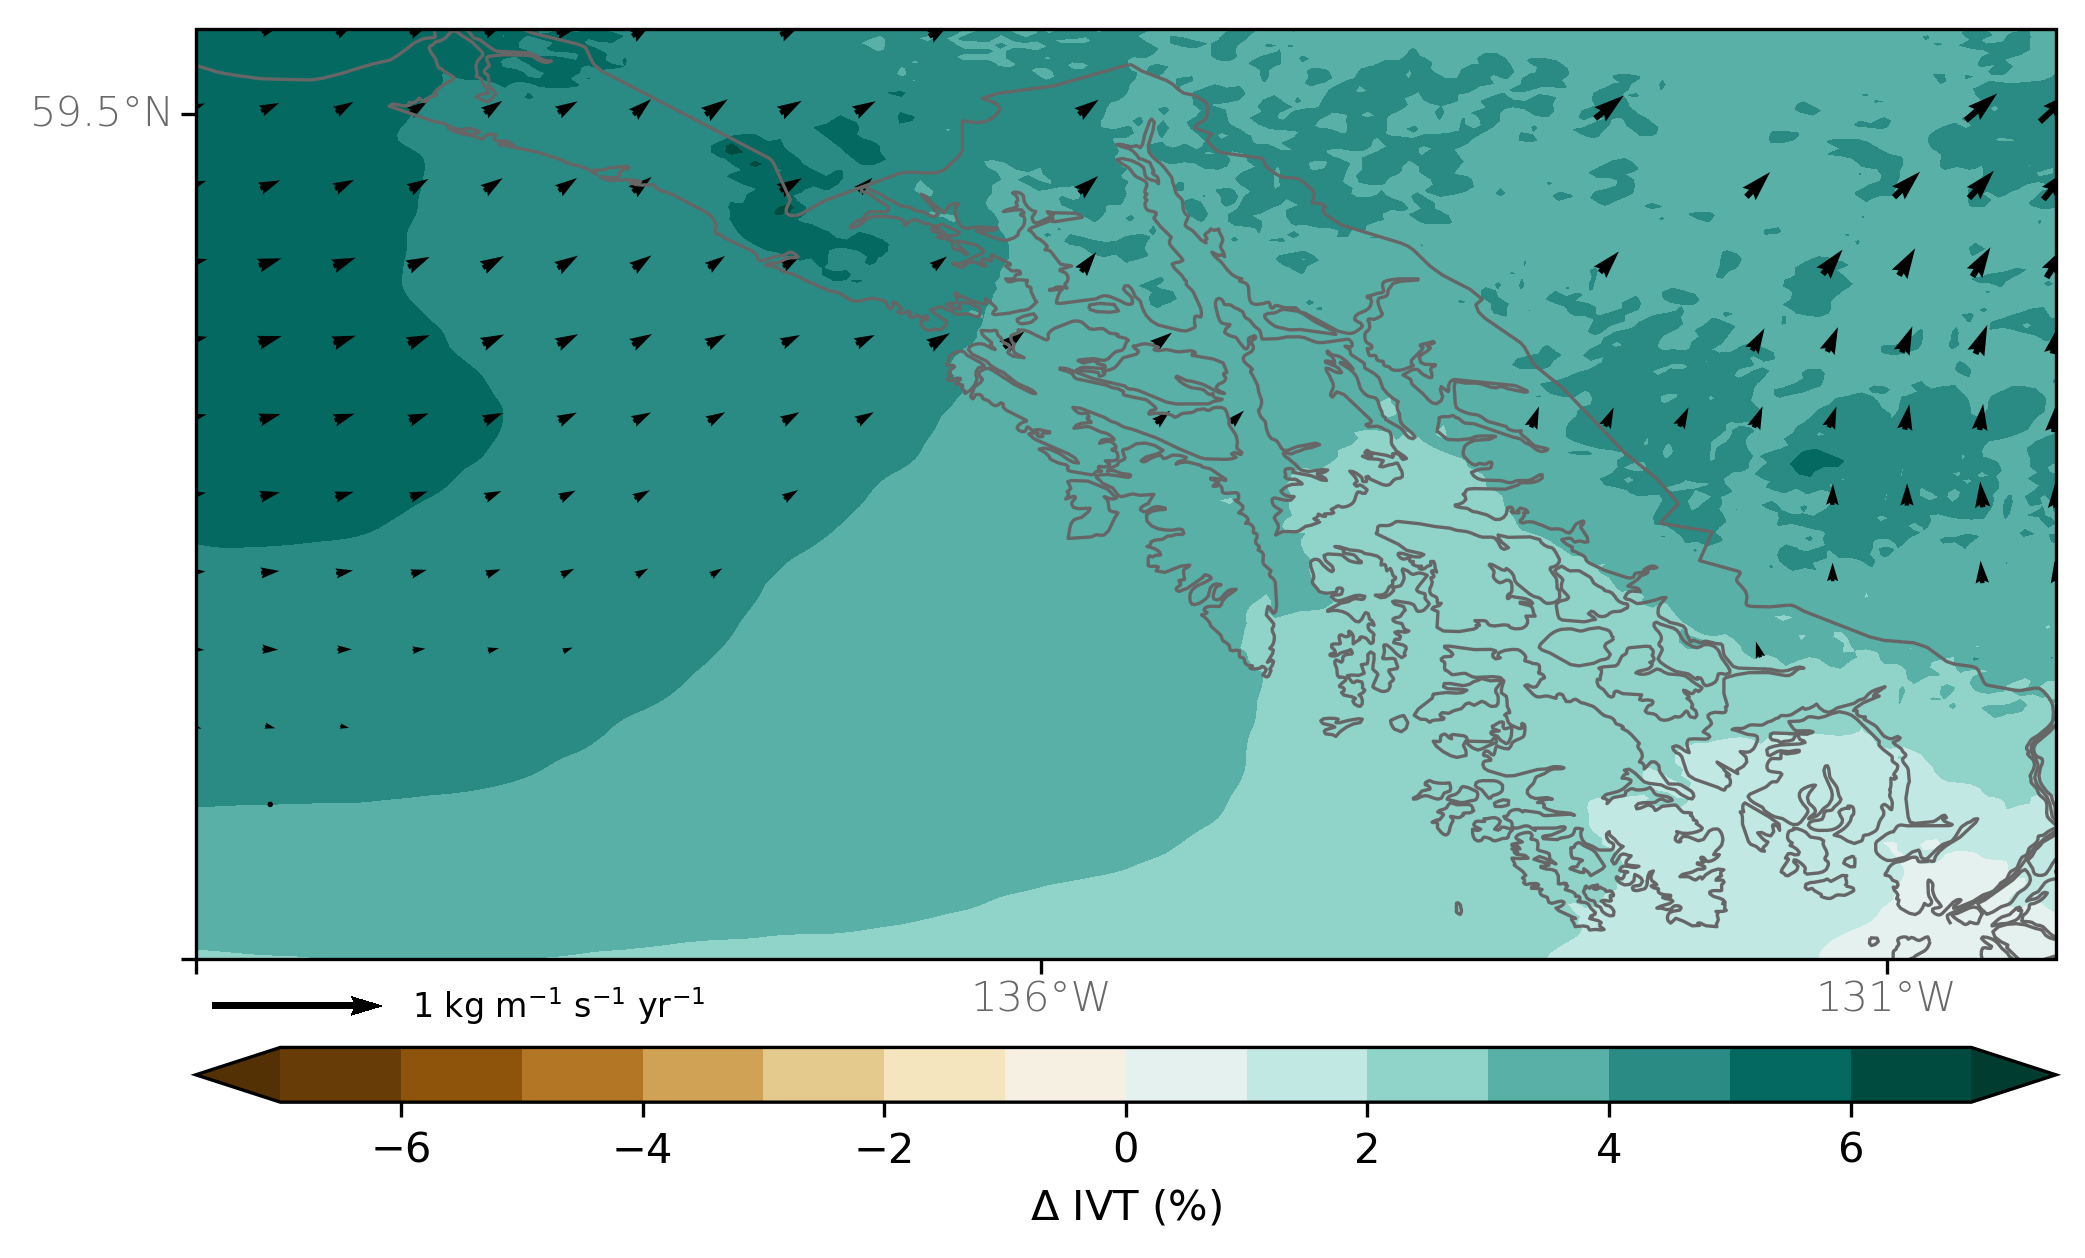

In [11]:
lonmin,lonmax,latmin,latmax = -141., -130., 54.5, 60.

# Set up projection
mapcrs = ccrs.PlateCarree()
datacrs = ccrs.PlateCarree()

# Set tick/grid locations
dx = np.arange(lonmin,lonmax+5,5)
dy = np.arange(latmin,latmax+5,5)

# Create figure
fig = plt.figure(figsize=(8, 5.))
fig.dpi = 300
fname = '../figs/ivt_trend_{0}'.format(ssn_str)
fmt = 'png'

nrows = 2
ncols = 1

## Use gridspec to set up a plot with a series of subplots that is
## n-rows by n-columns
gs = GridSpec(nrows, ncols, height_ratios=[1, 0.05], width_ratios = [1], wspace=0.02, hspace=0.01)
## use gs[rows index, columns index] to access grids

###################################
#### Big domain map with labels ###
###################################
ax = fig.add_subplot(gs[0, 0], projection=mapcrs)
ax = draw_basemap(ax, extent=[lonmin,lonmax,latmin,latmax], xticks=dx, yticks=dy,
                  left_lats=True, right_lats=False, bottom_lons=True)
# Data for plotting
uvec = trend_ivtu
vvec = trend_ivtv
data = trend_ivt
lons = ds.XLONG.values
lats = ds.XLAT.values

sig_level = 0.1
uvec_mask = uvec.trend.where((data.p <= sig_level)).values
vvec_mask = vvec.trend.where((data.p <= sig_level)).values

# Contour Filled
cflevs = np.arange(-7,8, 1)
perc_change = ((data.trend.values*29)/ssn_clim.ivt.values)*100.
print(np.nanmax(perc_change), np.nanmin(perc_change))
cf = ax.contourf(lons, lats, perc_change, transform=datacrs,
                levels=cflevs,cmap='BrBG', extend='both')

# cflevs = np.arange(0, 0.3, 0.05)
# cf = ax.contourf(lons, lats, data.trend.values, transform=datacrs,
#                 levels=cflevs,cmap=cmo.rain, extend='both')

# # Wind barbs / vectors
Q = ax.quiver(lons, lats, uvec_mask, vvec_mask, transform=datacrs, 
              color='k', regrid_shape=13, pivot='middle',
              angles='xy', scale_units='xy', scale=1, units='xy')

# # Colorbar (single)
# cb = fig.colorbar(cf, axgr.cbar_axes[0], orientation='horizontal', drawedges=True)
# cb.set_label(r'$\Delta$ IVT (%)', fontsize=10)
# cb.ax.tick_params(labelsize=10)

# Add color bar
cbax = plt.subplot(gs[1,0]) # colorbar axis
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal', ticklocation = 'bottom')
cb.set_label(r'$\Delta$ IVT (%)', fontsize=10)
cb.ax.tick_params(labelsize=10)

# quiver key
qk = ax.quiverkey(Q, 0.1, -0.05, 1, '1 kg m$^{-1}$ s$^{-1}$ yr$^{-1}$', labelpos='E',
                  coordinates='axes', fontproperties={'size': 8.0})

fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi)

# Show
plt.show()